This notebook was created to analyze the data after generating additional rows of data in an attempt to create a more balanced dataset.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a DataFrame
def load_dataset(file_path):
    return pd.read_json(file_path)

In [3]:
# Perform basic EDA
def perform_eda(df):
    # 1. Dataset overview
    overview = {
        "Total Commands": len(df),
        "Unique Intents": df['intent'].nunique(),
        "Intent Distribution": df['intent'].value_counts().to_dict(),
    }
    
    # 2. Flatten the rooms and actions for further analysis
    rooms_flat = [room for rooms in df['rooms'] for room in rooms]
    actions_flat = [action['action'] for actions in df['actions'] for action in actions]

    # Create Series for room and action frequencies
    rooms_series = pd.Series(rooms_flat)
    actions_series = pd.Series(actions_flat)

    # Top rooms and actions
    top_rooms = rooms_series.value_counts()
    top_actions = actions_series.value_counts()

    # Visualization: Intent Distribution
    plt.figure(figsize=(8, 5))
    df['intent'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Intents', fontsize=14)
    plt.xlabel('Intent', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Visualization: Top 10 Rooms
    plt.figure(figsize=(10, 6))
    top_rooms.plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Distribution of all Rooms', fontsize=14)
    plt.xlabel('Room', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    # Visualization: Top 10 Actions
    plt.figure(figsize=(10, 6))
    top_actions.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Distribution of Actions', fontsize=14)
    plt.xlabel('Action', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    return overview

In [4]:
# File path (Update this with the local path to your dataset)
root = "../../data"
file_name = "restructured_clean_FINAL.json"
file_path = os.path.join(root, file_name)

# Load and analyze the dataset
df = load_dataset(file_path)
df.head()

,command,intent,rooms,actions
0,Kitchen ko lights off garidinus.,single_room_control,[kitchen],"[{'room': 'kitchen', 'action': 'turn_off'}]"
1,Please turn on the store room lights.,single_room_control,[store room],"[{'room': 'store room', 'action': 'turn_on'}]"
2,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,"[living room, kitchen]","[{'room': 'living room', 'action': 'adjust_bri..."
3,Turn off the balcony lights.,single_room_control,[balcony],"[{'room': 'balcony', 'action': 'turn_off'}]"
4,Padhney kotha ko light blue color ma change ga...,single_room_control,[study room],"[{'room': 'study room', 'action': 'change_colo..."


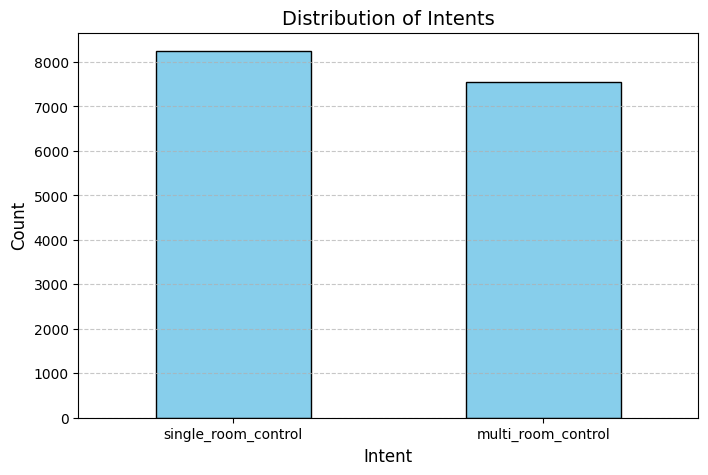

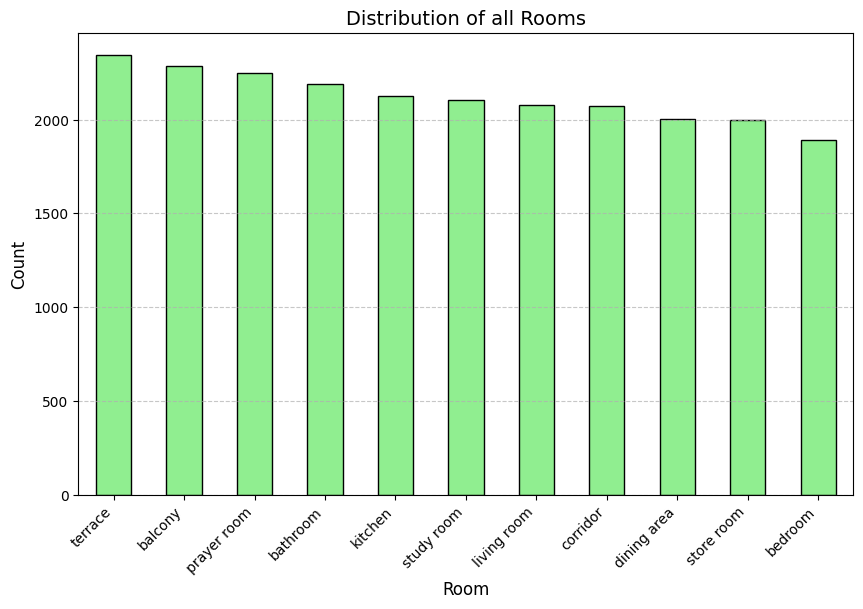

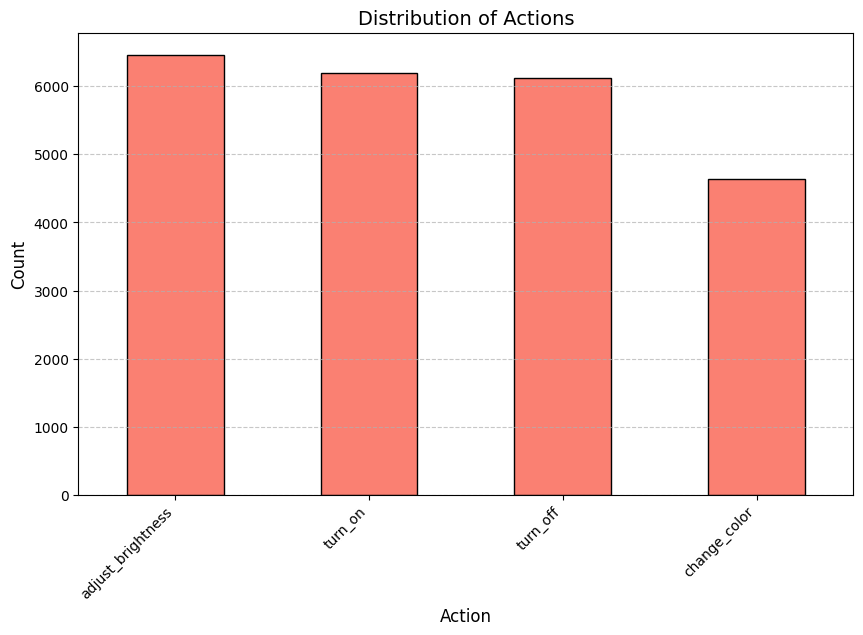

Dataset Overview:
Total Commands: 15796
Unique Intents: 2
Intent Distribution: {'single_room_control': 8246, 'multi_room_control': 7550}


In [5]:
overview = perform_eda(df)

# Print dataset overview
print("Dataset Overview:")
for key, value in overview.items():
    print(f"{key}: {value}")

In [6]:
df1 = df.copy()
df1.head()

,command,intent,rooms,actions
0,Kitchen ko lights off garidinus.,single_room_control,[kitchen],"[{'room': 'kitchen', 'action': 'turn_off'}]"
1,Please turn on the store room lights.,single_room_control,[store room],"[{'room': 'store room', 'action': 'turn_on'}]"
2,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,"[living room, kitchen]","[{'room': 'living room', 'action': 'adjust_bri..."
3,Turn off the balcony lights.,single_room_control,[balcony],"[{'room': 'balcony', 'action': 'turn_off'}]"
4,Padhney kotha ko light blue color ma change ga...,single_room_control,[study room],"[{'room': 'study room', 'action': 'change_colo..."


In [7]:
df1_single = df1[df1['intent'] == 'single_room_control']

Text(0.5, 1.0, 'Single Room intents - Room Distribution')

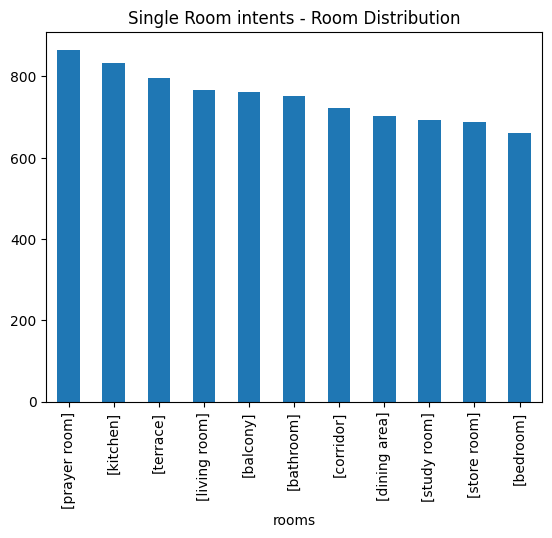

In [8]:
df1_single['rooms'].value_counts().plot(kind='bar')
plt.title("Single Room intents - Room Distribution")

In [9]:
df1_multi = df1[df1['intent'] == 'multi_room_control']
df1_multi

,command,intent,rooms,actions
2,Baithak kotha and bhaancha ko lights full brig...,multi_room_control,"[living room, kitchen]","[{'room': 'living room', 'action': 'adjust_bri..."
7,Please turn on the corridor lights and dim the...,multi_room_control,"[corridor, terrace]","[{'room': 'corridor', 'action': 'turn_on'}, {'..."
8,Bato ko lights off garera baranda ko lights on...,multi_room_control,"[corridor, balcony]","[{'room': 'corridor', 'action': 'turn_off'}, {..."
21,Baithak kothaa ko lights on garera sutney koth...,multi_room_control,"[living room, bedroom]","[{'room': 'living room', 'action': 'turn_on'},..."
24,Turn on the balcony lights and make store room...,multi_room_control,"[balcony, store room]","[{'room': 'balcony', 'action': 'turn_on'}, {'r..."
...,...,...,...,...
12340,Batti dim gara snaan kotha ra khaana kotha ma.,multi_room_control,"[bathroom, dining area]","[{'room': 'bathroom', 'action': 'adjust_bright..."
12341,Turn on the lights in the bathroom and corridor.,multi_room_control,"[bathroom, corridor]","[{'room': 'bathroom', 'action': 'turn_on'}, {'..."
12342,Store room ra mandir ma batti balera rakhnus.,multi_room_control,"[store room, prayer room]","[{'room': 'store room', 'action': 'turn_on'}, ..."
12343,Please dim the lights in the terrace and dinin...,multi_room_control,"[terrace, dining area]","[{'room': 'terrace', 'action': 'adjust_brightn..."


In [10]:
#checking for occurences of living room and kitchen together
df_living_kitchen = df1_multi[df1_multi['rooms'].apply(lambda x: x == ['living room', 'kitchen'] or x == ['kitchen', 'living room'])]

In [11]:
rooms_flat_1 = [room for rooms in df1_multi['rooms'] for room in rooms]
actions_flat_1 = [action['action'] for actions in df1_multi['actions'] for action in actions]

# Create Series for room and action frequencies
rooms_series_1 = pd.Series(rooms_flat_1)
actions_series_1 = pd.Series(actions_flat_1)

Text(0.5, 1.0, 'Multi room intents - Room Distribution')

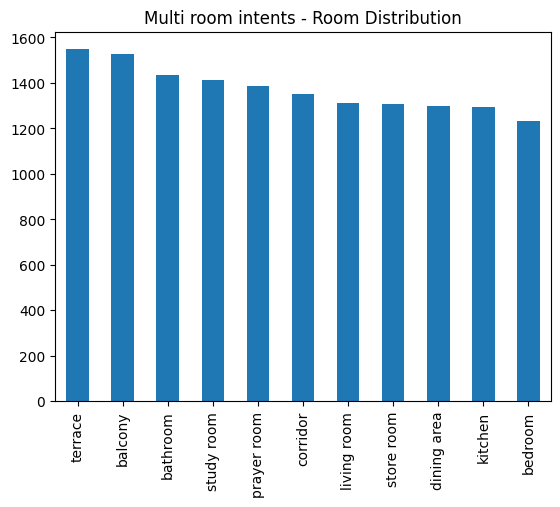

In [12]:
rooms_series_1.value_counts().plot(kind='bar')
plt.title("Multi room intents - Room Distribution")

In [13]:
with pd.option_context('display.max_rows', None,):
    print(pd.DataFrame(df1_multi['rooms'].value_counts()))

                                 count
rooms                                 
[kitchen, living room]             628
[study room, balcony]              538
[living room, kitchen]             398
[balcony, study room]              346
[bedroom, balcony]                 266
[bedroom, study room]              246
[study room, bedroom]              228
[balcony, bedroom]                 210
[terrace, bathroom]                204
[store room, bathroom]             173
[terrace, prayer room]             166
[dining area, terrace]             163
[store room, corridor]             157
[dining area, bathroom]            156
[dining area, corridor]            156
[bathroom, dining area]            155
[terrace, dining area]             151
[bathroom, terrace]                146
[corridor, terrace]                145
[store room, terrace]              142
[prayer room, bathroom]            138
[corridor, prayer room]            135
[store room, prayer room]          135
[prayer room, corridor]  

Upon looking at the dataset carefully for multi room control, there appears to be some invalid room pairings as mentioned below. Removing those,

In [14]:
invalid_pairs = {("kitchen", "kitchen"), ("terrace", "terrace"), ("bedroom", "bedroom"),
                 ("corridor", "corridor"), ("study room", "study room"),
                 ("store room", "store room"), ("prayer room", "prayer room")}

# df1_multi_filtered = [entry for entry in df1_multi if tuple(sorted(entry["rooms"])) not in invalid_pairs]
df1_multi_filtered = [[df1_multi.iloc[i].name, df1_multi.iloc[i, 2]] for i in range(len(df1_multi)) if tuple(sorted(df1_multi.iloc[i, 2])) in invalid_pairs]

In [15]:
len(df1_multi_filtered)

18

In [16]:
df1_multi_filtered

[[109, ['kitchen', 'kitchen']],
 [890, ['corridor', 'corridor']],
 [1112, ['kitchen', 'kitchen']],
 [1125, ['store room', 'store room']],
 [1377, ['kitchen', 'kitchen']],
 [1537, ['bedroom', 'bedroom']],
 [1567, ['bedroom', 'bedroom']],
 [1723, ['kitchen', 'kitchen']],
 [1793, ['kitchen', 'kitchen']],
 [1799, ['study room', 'study room']],
 [1985, ['kitchen', 'kitchen']],
 [1993, ['terrace', 'terrace']],
 [4188, ['corridor', 'corridor']],
 [4346, ['terrace', 'terrace']],
 [4499, ['kitchen', 'kitchen']],
 [10248, ['prayer room', 'prayer room']],
 [10654, ['terrace', 'terrace']],
 [12009, ['terrace', 'terrace']]]

In [95]:
# import json
# file_path = "../../data/restructured_clean_FINAL.json"


# with open(file_path, 'r') as f:
#     op = json.load(f)


# useless = []
# for i in range(len(op)):
#     roomVal = op[i]['rooms'] 
#     for room in roomVal:
#         if room in ['store', 'dining']:
#             useless.append(op[i])

# print(len(op))
# for jVal in op:
#     if jVal in useless:
#         op.remove(jVal)

# print(len(op))

# out_file = open("restructured_Clean_FINAL.json", "w")
# json.dump(op, out_file, ensure_ascii=False, indent=4)
# out_file.close()